<a href="https://colab.research.google.com/github/mazenalborno/rnnExample/blob/main/rnnExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code below builds and simulate a $N=500$ randomly-connected RNN. Each unit in the RNN also receives a periodic input of frequency $\omega$
$$
h_i = I \cos(\omega t + \theta_i)
$$
where phases $\theta_i$ are distributed uniformely across neurons. To begin with, the value of $I$ is set to zero. 

The code simulates the RNN activity by integrating numerically the dynamics through Euler's method. Dynamics is simulated between $0$ and $t=T=100$. In order to apply Euler's method, we create a discretized time vector ($\Delta t = 0.01$), and then use:
$$x_{i,t+1} = x_{i,t} + \Delta t \frac{d x_{i,t}}{d t} = 
(1 - \Delta t )x_{i,t} + \Delta t \left[ \sum_{j=1}^{N} J_{i j} \phi\left(x_{j,t}\right)+h_{i,t} \right].$$


In [ ]:
### Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import rc
#rc('text', usetex=True)

### Plot configuration

fig_width = 4.2 # width in inches
fig_height = 3.  # height in inches
fig_size =  [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Generate network

N = 500      # Network size
g = 0.8      # Connectivity strength
I = 0.0       # Input strength
omega = 2.5  # Input frequency

# Connectivity

J = g/np.sqrt(N) * np.random.normal(0, 1., (N,N))
eig = np.linalg.eigvals(J)

# Input phases

theta = 2. * np.pi * np.random.uniform(0, 1., N)

#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Simulate activity 

# Function simulating one time step

def sim_step (x_step, t_step):
  x_step = (1.0-dt) * x_step + dt * np.dot(J, np.tanh(x_step)) + dt * I * np.cos(omega*t_step + theta)
  return x_step

# Parameters

T = 100                          # Total time
dt = 0.01                        # Time step
t = np.linspace(0, T, int(T/dt))      # Time array

# Activity vector (time x neurons), initialize at random

x = np.zeros(( len(t), N ))
x[0,:] = np.random.normal(0, 1., N)

# Simulate dynamics

for it, ti in enumerate(t[:-1]):
	x[it+1,:] = sim_step(x[it,:], ti)

r = np.tanh(x)

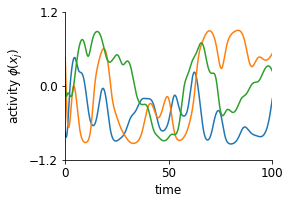

In [ ]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Plot activity of the first 3 neurons

fg = plt.figure()
ax0 = plt.axes(frameon=True)

plt.plot(t, r[:,0:3])

plt.xlabel('time')
plt.ylabel(r'activity $\phi(x_j)$')

plt.xlim(0, T)
plt.ylim(-1.2, 1.2)
plt.xticks([0, T//2, T])
plt.yticks([-1.2, 0, 1.2])
plt.show()